In [1]:
import pandas as pd
import datetime

import json as json
from pandas.io.json import json_normalize

import numpy as np
import os
import scipy.optimize as sco
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
array_dataframe = []
dados = pd.DataFrame([])

folder_candle = '14400seconds'

for entry in os.scandir(folder_candle):
    if entry.is_file():
        coin_symbol = (os.path.splitext(entry.name)[0])        
        with open(entry.path) as d:            
            coin_hist = json.load(d);
        df = json_normalize(coin_hist);
        
        df['coin'] = coin_symbol
        df['date'] = pd.to_datetime(df['date'], unit='s')
        df['date_chart'] = pd.to_datetime(df['date'], unit='s', format='%Y-%m-%d').dt.date
        df['variation'] = df['close'].sub(df['open'])        
        df['return'] = np.divide(df['close'].sub(df['open']),df["close"].shift(1))
        df['log_return'] = np.log(df['close']) - np.log(df["close"].shift(1))
        df['log_volume'] = np.log(df['volume'])
        
        array_dataframe.append(df)       
        
dados = pd.concat(array_dataframe)

dados = dados.replace([np.inf, -np.inf], np.nan)
dados = dados.fillna(0)

dados.head()

/home/nikolasmagno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


,close,date,high,low,open,quoteVolume,volume,weightedAverage,coin,date_chart,variation,return,log_return,log_volume
0,540.000000,2017-08-14 00:00:00,0.330000,200.000000,0.330000,994.980943,4.361499e+05,438.349981,USDT_BCH,2017-08-14,539.670000,0.000000,0.000000,12.985741
1,301.921559,2017-08-14 04:00:00,540.000000,300.000000,500.000000,2051.860477,7.042301e+05,343.215374,USDT_BCH,2017-08-14,-198.078441,-0.366812,-0.581402,13.464860
2,304.950000,2017-08-14 08:00:00,314.743723,300.000000,307.200000,1715.091816,5.224386e+05,304.612616,USDT_BCH,2017-08-14,-2.250000,-0.007452,0.009981,13.166263
3,300.490000,2017-08-14 12:00:00,309.100001,293.000000,305.700000,3345.890570,1.005039e+06,300.380049,USDT_BCH,2017-08-14,-5.210000,-0.017085,-0.014733,13.820537
4,296.000000,2017-08-14 16:00:00,300.490200,289.977286,300.489999,2798.249551,8.222882e+05,293.858060,USDT_BCH,2017-08-14,-4.489999,-0.014942,-0.015055,13.619846


In [3]:
grouped_data = dados.groupby('coin', as_index=False)

sorted_grouped_data = sorted(
    grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
    key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
    reverse=True  # largest first
)

grouped_data.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage,coin,date_chart,variation,return,log_return,log_volume
0,540.000000,2017-08-14 00:00:00,0.330000,200.000000,0.330000,994.980943,4.361499e+05,438.349981,USDT_BCH,2017-08-14,539.670000,0.000000e+00,0.000000e+00,1.298574e+01
1,301.921559,2017-08-14 04:00:00,540.000000,300.000000,500.000000,2051.860477,7.042301e+05,343.215374,USDT_BCH,2017-08-14,-198.078441,-3.668119e-01,-5.814019e-01,1.346486e+01
2,304.950000,2017-08-14 08:00:00,314.743723,300.000000,307.200000,1715.091816,5.224386e+05,304.612616,USDT_BCH,2017-08-14,-2.250000,-7.452267e-03,9.980585e-03,1.316626e+01
3,300.490000,2017-08-14 12:00:00,309.100001,293.000000,305.700000,3345.890570,1.005039e+06,300.380049,USDT_BCH,2017-08-14,-5.210000,-1.708477e-02,-1.473335e-02,1.382054e+01
4,296.000000,2017-08-14 16:00:00,300.490200,289.977286,300.489999,2798.249551,8.222882e+05,293.858060,USDT_BCH,2017-08-14,-4.489999,-1.494226e-02,-1.505502e-02,1.361985e+01
0,225.000000,2015-02-19 16:00:00,0.330000,225.000000,0.330000,0.004444,9.999990e-01,225.000000,USDT_BTC,2015-02-19,224.670000,0.000000e+00,0.000000e+00,-1.000001e-06
1,244.000000,2015-02-19 20:00:00,244.000000,225.000000,225.000000,0.188673,4.527631e+01,239.972355,USDT_BTC,2015-02-19,19.000000,8.444444e-02,8.106782e-02,3.812784e+00
2,244.000000,2015-02-20 00:00:00,244.000000,244.000000,244.000000,0.000000,0.000000e+00,244.000000,USDT_BTC,2015-02-20,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
3,240.250116,2015-02-20 04:00:00,240.250118,240.250116,240.250118,0.044000,1.057101e+01,240.250116,USDT_BTC,2015-02-20,-0.000002,-9.877049e-09,-1.548770e-02,2.358115e+00
4,240.250000,2015-02-20 08:00:00,245.000000,240.250000,244.000000,0.186429,4.532389e+01,243.115646,USDT_BTC,2015-02-20,-3.750000,-1.560873e-02,-4.814983e-07,3.813834e+00


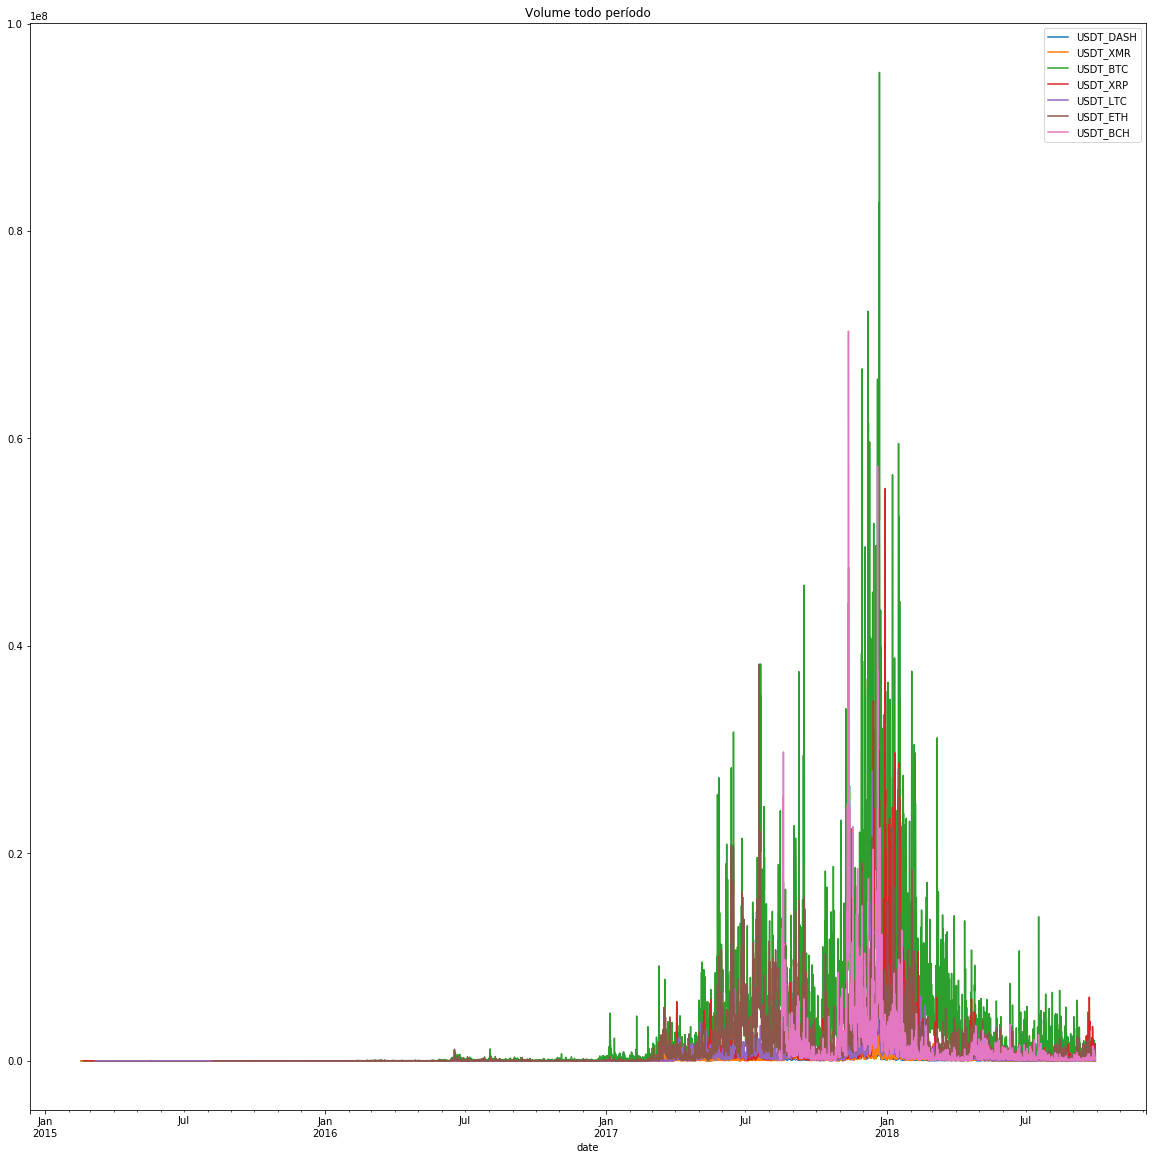

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY,scoin, log=False):    
    #data.dropna().plot(kind='density', figsize=(15,10))
    data.dropna().plot(kind='line', x=attrX, y=attrY, figsize=(20,20), ax=ax, label=scoin)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )
    
    for scoin, stock_code_data in sorted_grouped_data:        
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
    
    plt.title('Volume todo período')

plot_all_histograms(grouped_data, plt, "date","volume")

In [5]:
periodo = grouped_data.apply(lambda g: g[(g['date'] > datetime(2017,6,1)) & (g['date'] < datetime(2018,1,1)) ])

periodo.set_index('date', inplace=True)
periodo.head()


,close,high,low,open,quoteVolume,volume,weightedAverage,coin,date_chart,variation,return,log_return,log_volume
date,,,,,,,,,,,,,
2017-08-14 00:00:00,540.000000,0.330000,200.000000,0.330000,994.980943,4.361499e+05,438.349981,USDT_BCH,2017-08-14,539.670000,0.000000,0.000000,12.985741
2017-08-14 04:00:00,301.921559,540.000000,300.000000,500.000000,2051.860477,7.042301e+05,343.215374,USDT_BCH,2017-08-14,-198.078441,-0.366812,-0.581402,13.464860
2017-08-14 08:00:00,304.950000,314.743723,300.000000,307.200000,1715.091816,5.224386e+05,304.612616,USDT_BCH,2017-08-14,-2.250000,-0.007452,0.009981,13.166263
2017-08-14 12:00:00,300.490000,309.100001,293.000000,305.700000,3345.890570,1.005039e+06,300.380049,USDT_BCH,2017-08-14,-5.210000,-0.017085,-0.014733,13.820537
2017-08-14 16:00:00,296.000000,300.490200,289.977286,300.489999,2798.249551,8.222882e+05,293.858060,USDT_BCH,2017-08-14,-4.489999,-0.014942,-0.015055,13.619846


Text(0.5, 1.0, 'Volume Segundo Semestre 2017')

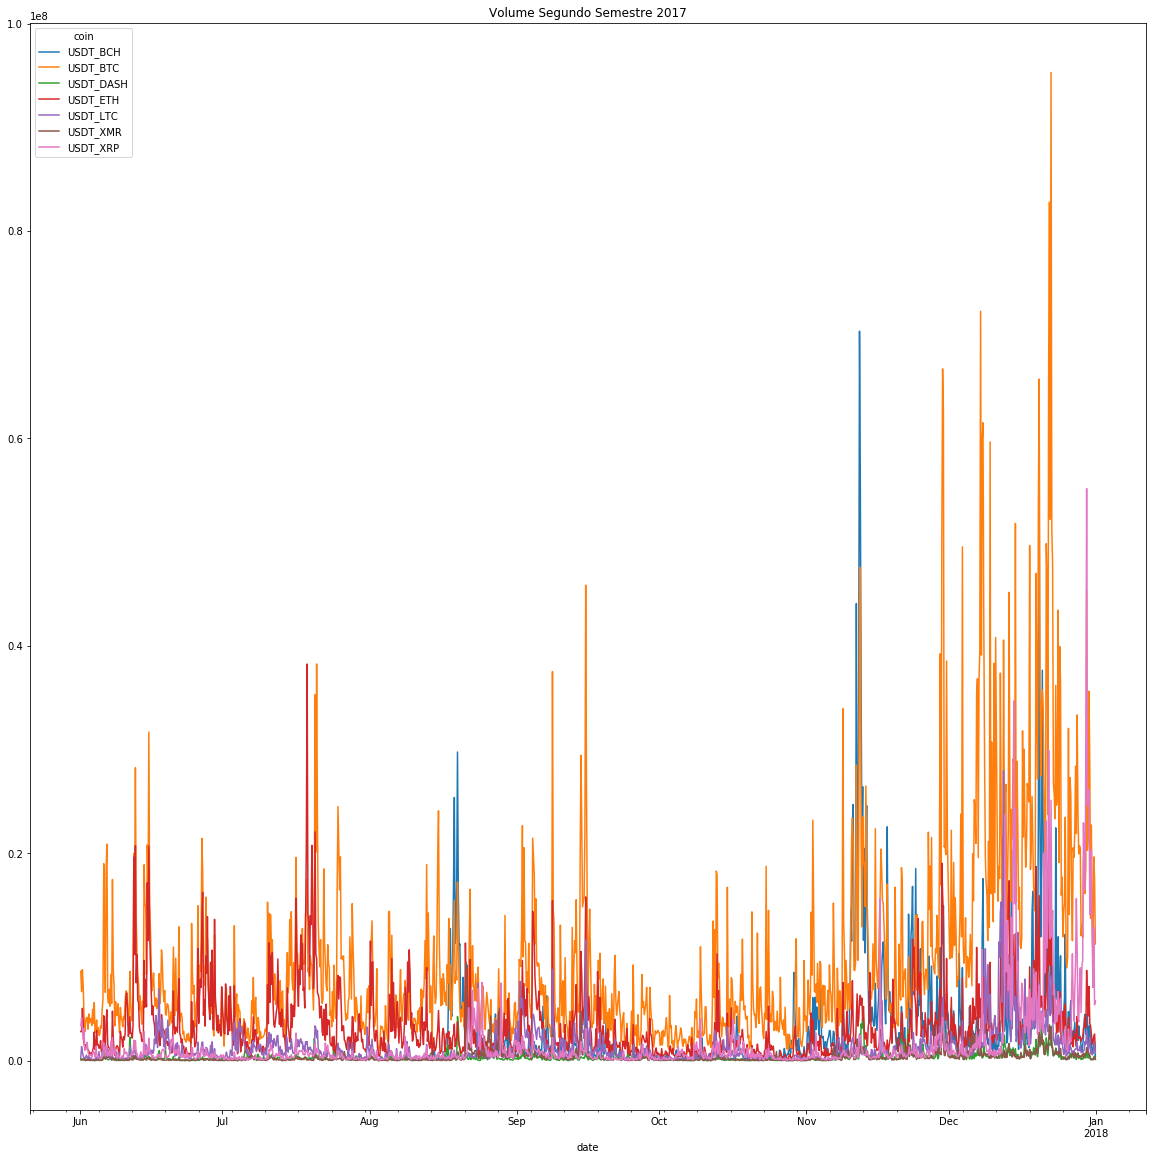

In [25]:
periodo.pivot(columns='coin', values='volume').plot(kind='line', figsize=(20,20))
plt.title('Volume Segundo Semestre 2017')

Text(0.5, 1.0, 'Volume mês de Junho')

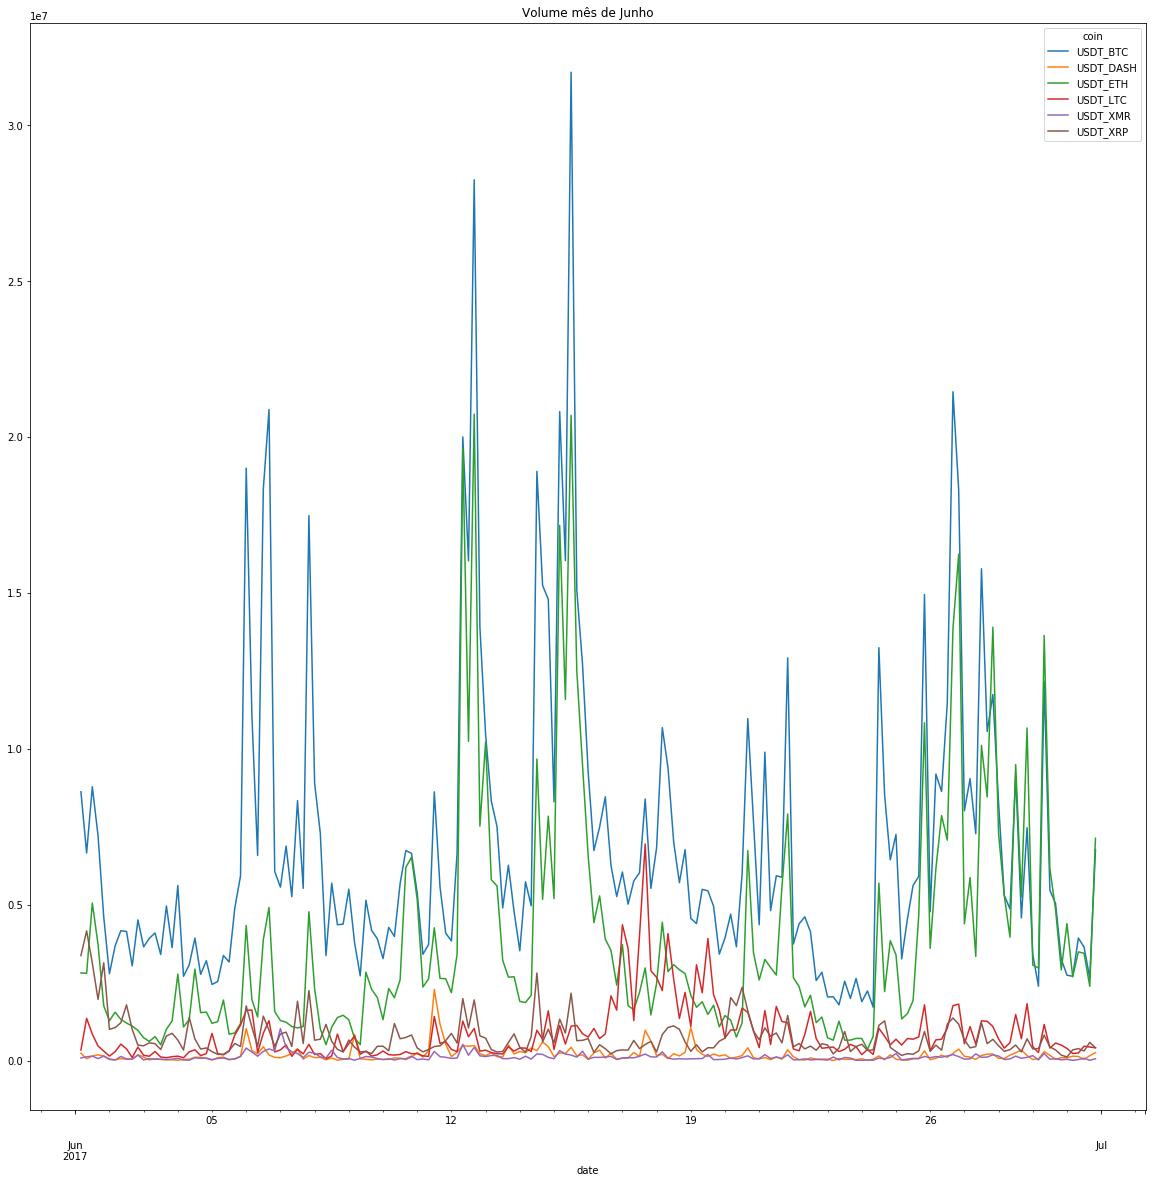

In [26]:
periodo2 = grouped_data.apply(lambda g: g[(g['date'] > datetime(2017,6,1)) & (g['date'] < datetime(2017,7,1)) ])

periodo2.set_index('date', inplace=True)

periodo2.pivot(columns='coin', values='volume').plot(kind='line', figsize=(20,20))
plt.title('Volume mês de Junho')

Text(0.5, 1.0, 'Volume 15 dias de junho')

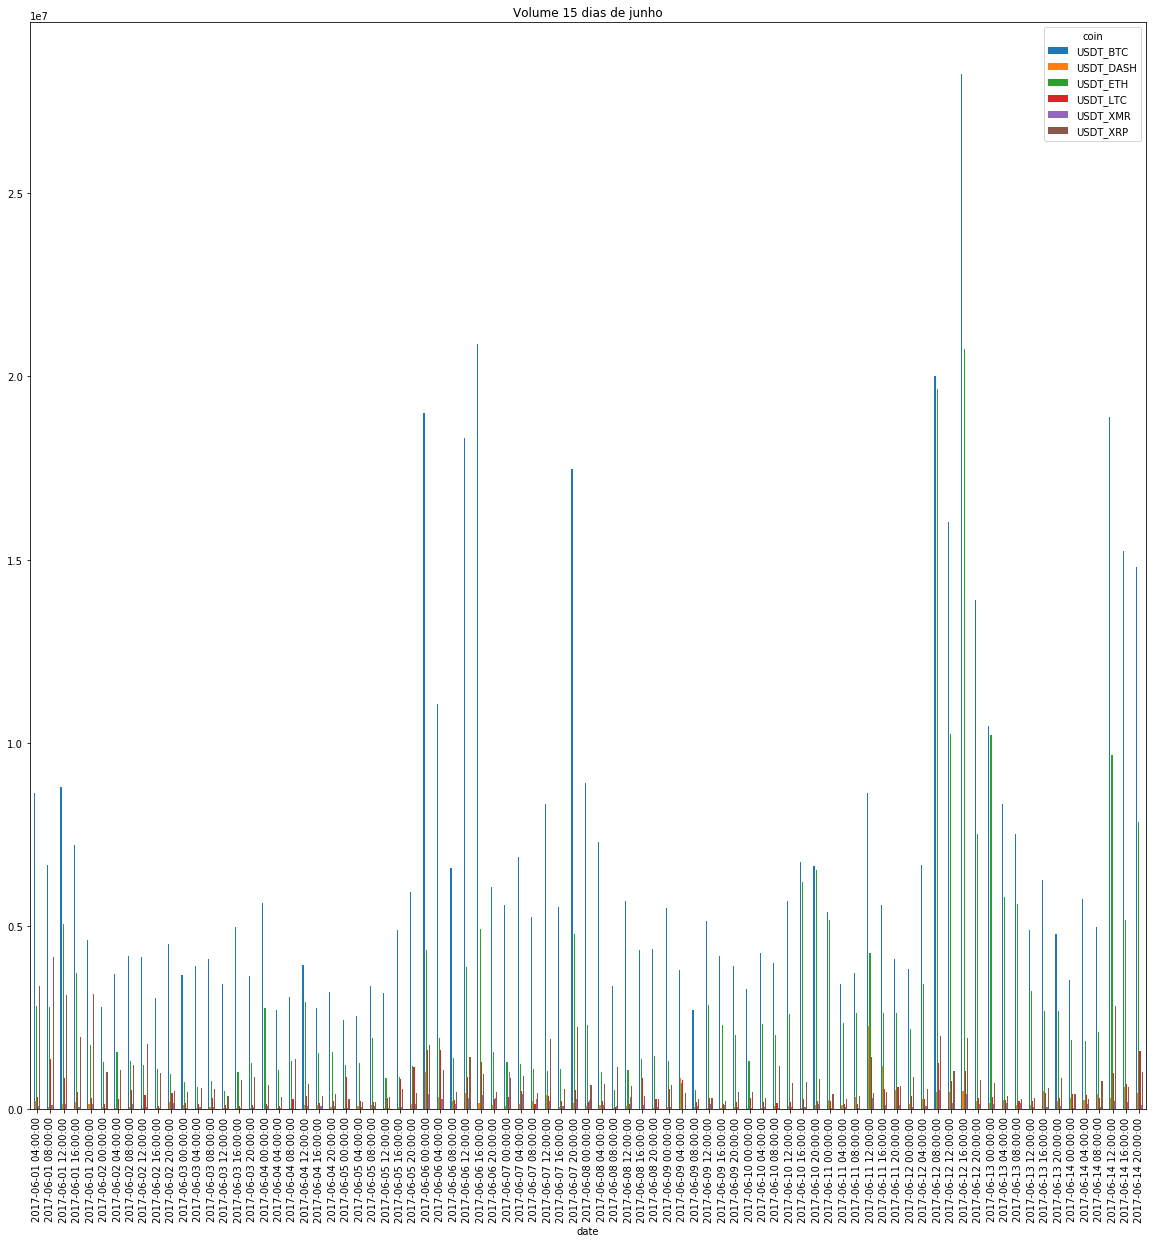

In [27]:
periodo2 = grouped_data.apply(lambda g: g[(g['date'] > datetime(2017,6,1)) & (g['date'] < datetime(2017,6,15)) ])

periodo2.set_index('date', inplace=True)

periodo2.pivot(columns='coin', values='volume').plot(kind='bar', figsize=(20,20))
plt.title('Volume 15 dias de junho')

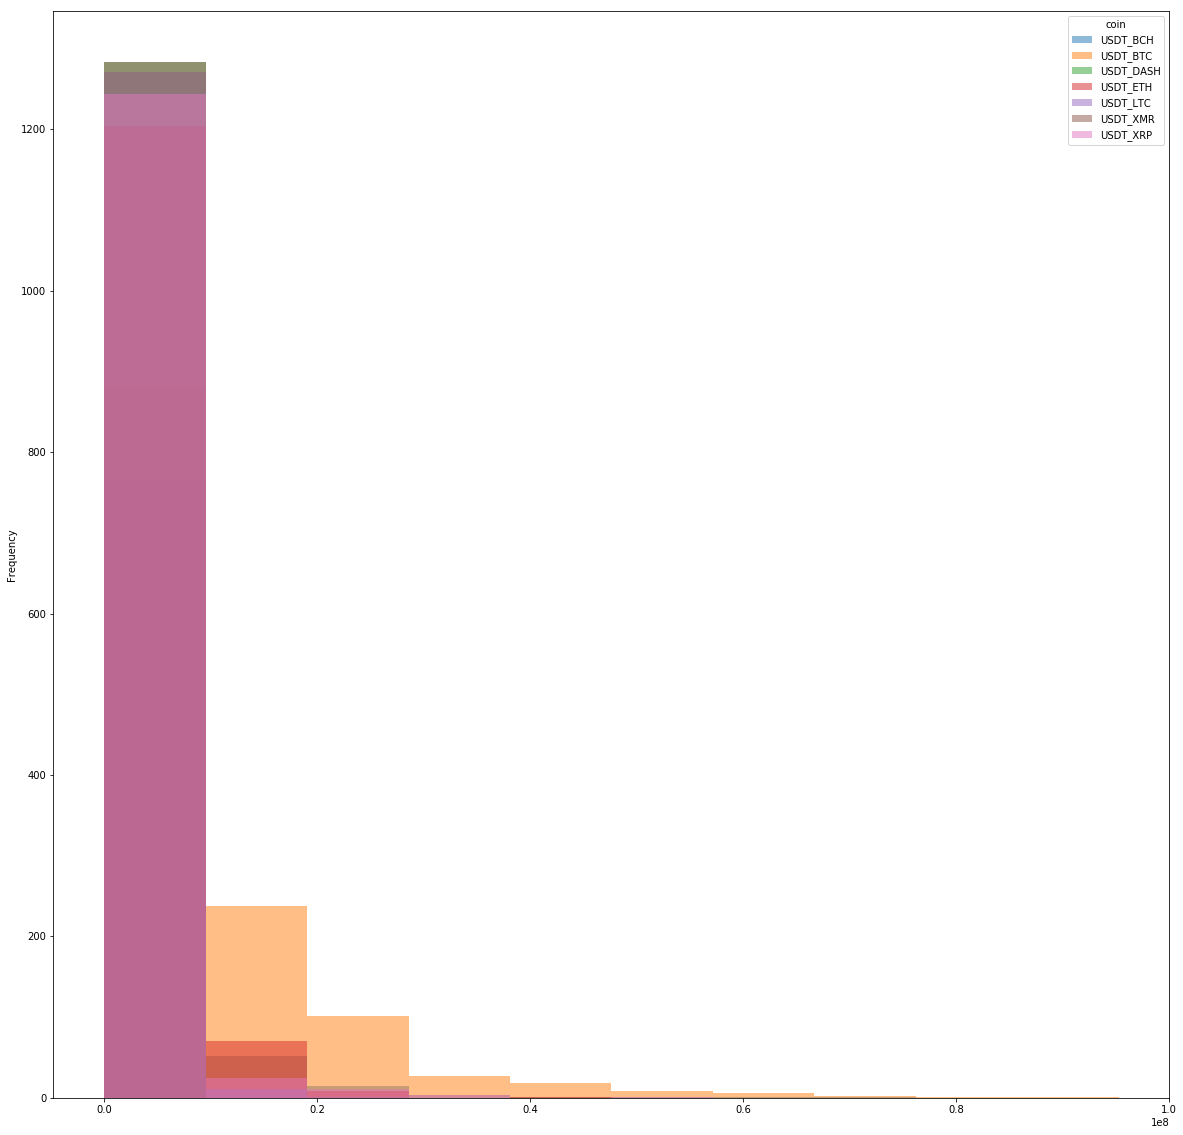

In [20]:
periodo.pivot(columns='coin', values='volume').plot(kind='hist', figsize=(20,20), alpha=0.5)

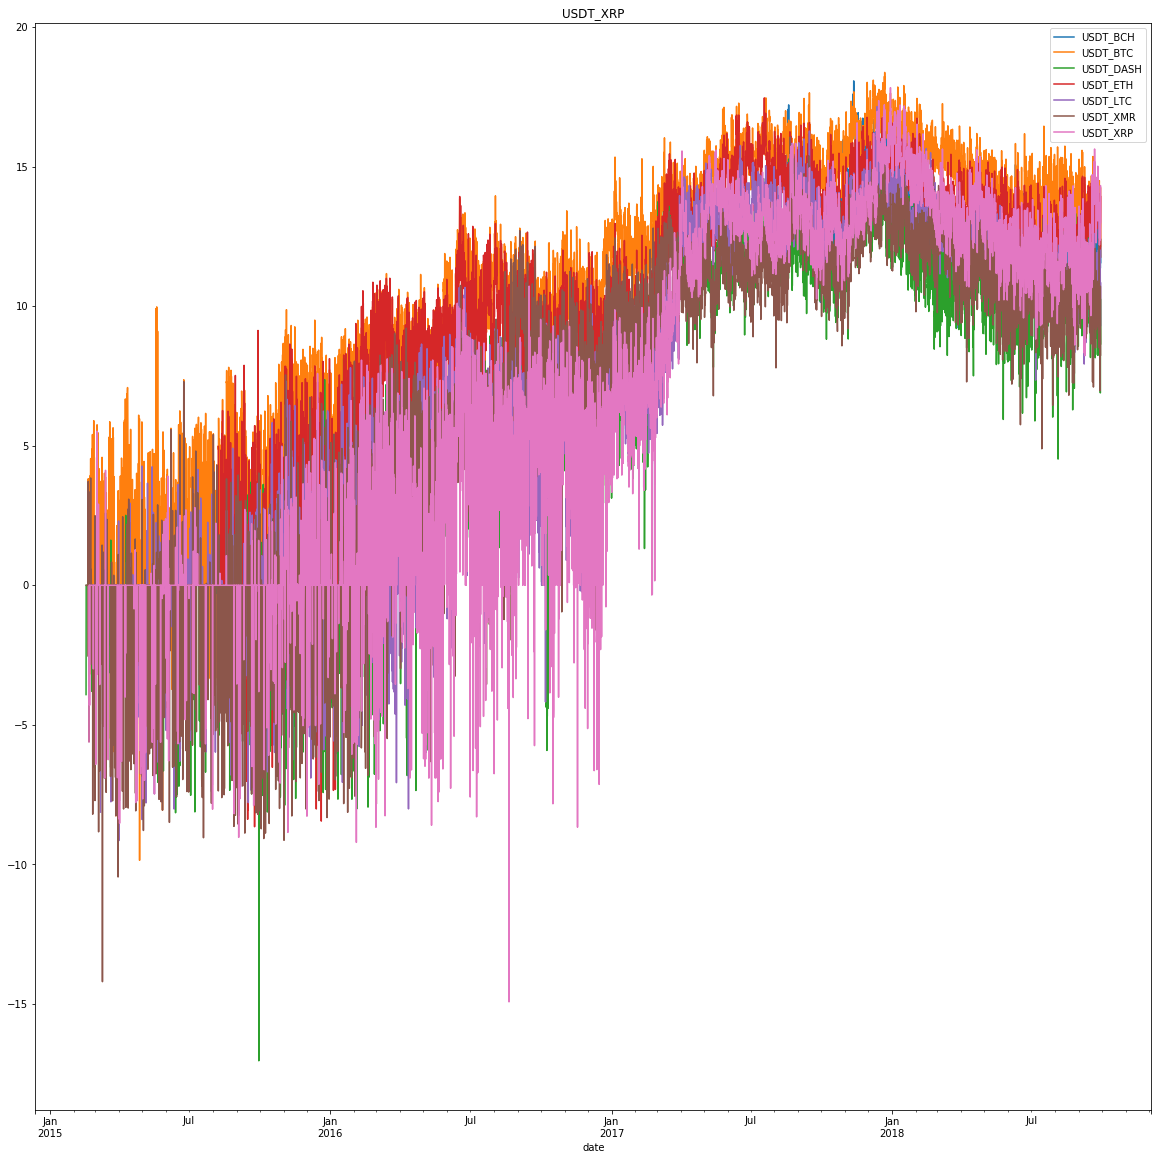

In [9]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY,scoin, log=False):    
    #data.dropna().plot(kind='density', figsize=(15,10))
    data.dropna().plot(kind='line', x=attrX, y=attrY, figsize=(20,20), ax=ax, label=scoin)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
        
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )

    for scoin, stock_code_data in grouped_data:
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
        plt.title(scoin)

plot_all_histograms(grouped_data, plt, "date","log_volume")

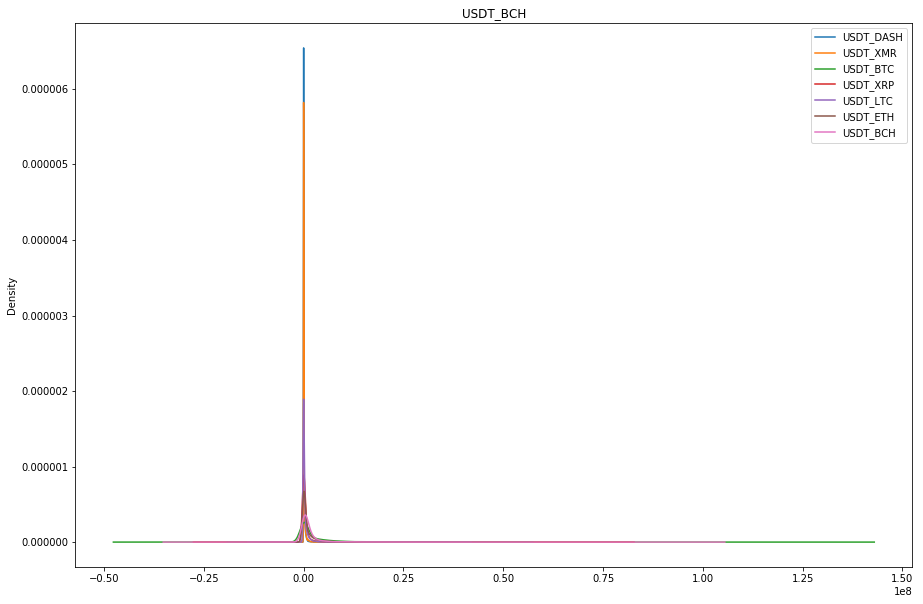

In [10]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY, scoin, log=False):    
    data.dropna().plot(kind='density',x=attrX, y=attrY, figsize=(15,10),ax=ax, label=scoin)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )

    for scoin, stock_code_data in sorted_grouped_data:
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
        plt.title(scoin)

plot_all_histograms(grouped_data, plt, "date","volume")

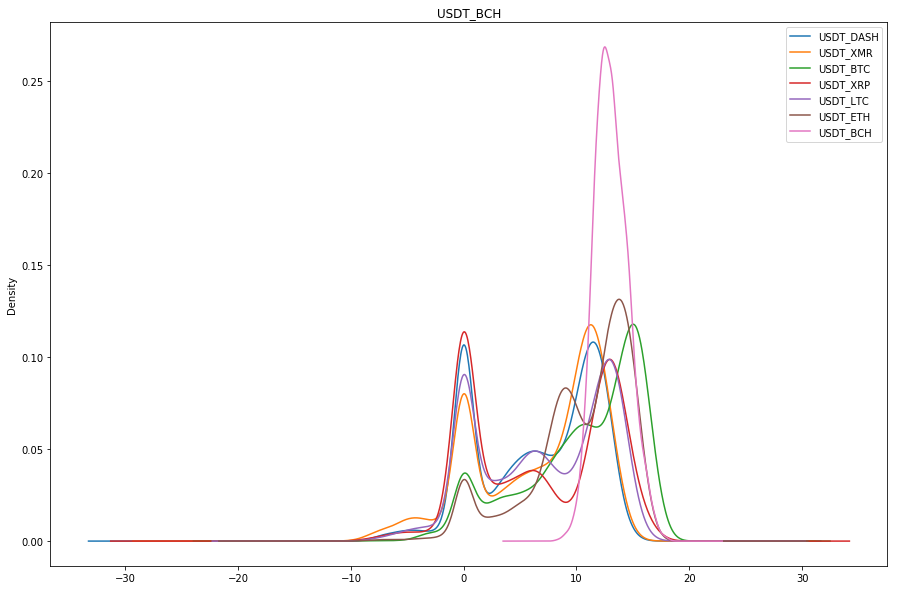

In [11]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY, scoin, log=False):    
    data.dropna().plot(kind='density',x=attrX, y=attrY, figsize=(15,10),ax=ax, label=scoin)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )

    for scoin, stock_code_data in sorted_grouped_data:
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
        plt.title(scoin)

plot_all_histograms(grouped_data, plt, "date","log_volume")

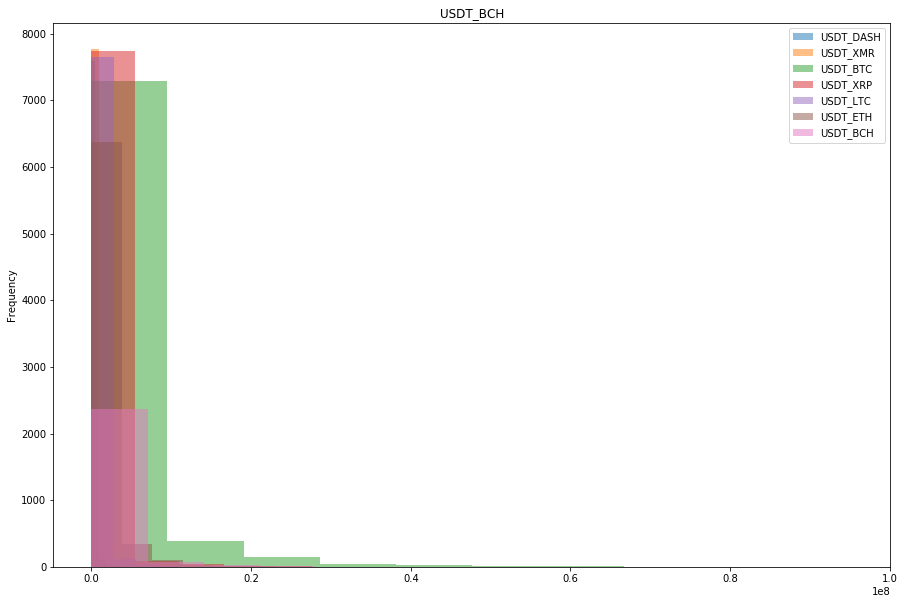

In [12]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY, scoin, log=False):    
    data.dropna().plot(kind='hist',x=attrX, y=attrY, figsize=(15,10),ax=ax, label=scoin, alpha=0.5)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )

    for scoin, stock_code_data in sorted_grouped_data:
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
        plt.title(scoin)

plot_all_histograms(grouped_data, plt, "date","volume")

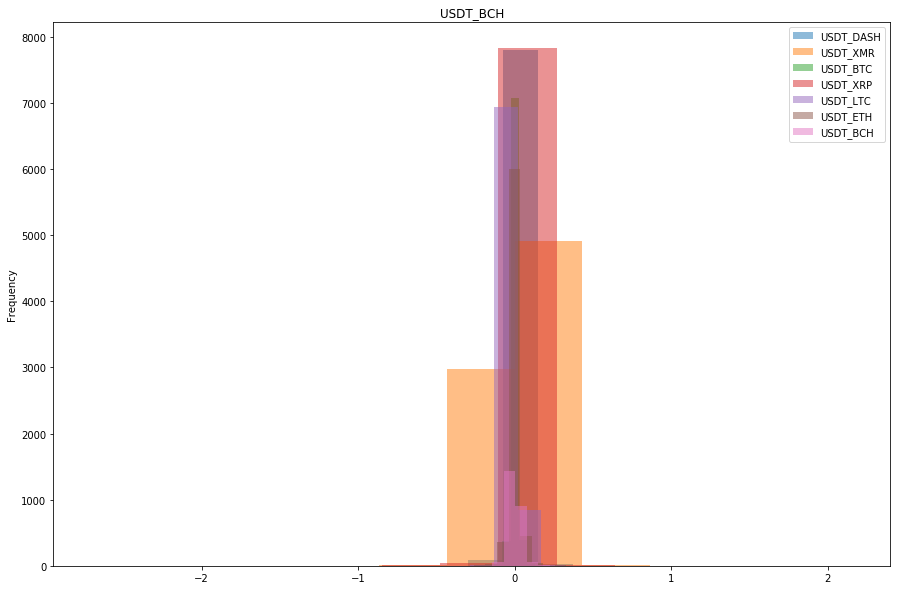

In [13]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY, scoin, log=False):    
    data.dropna().plot(kind='hist',x=attrX, y=attrY, figsize=(15,10),ax=ax, label=scoin, alpha=0.5)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )

    for scoin, stock_code_data in sorted_grouped_data:
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
        plt.title(scoin)

plot_all_histograms(grouped_data, plt, "date","return")

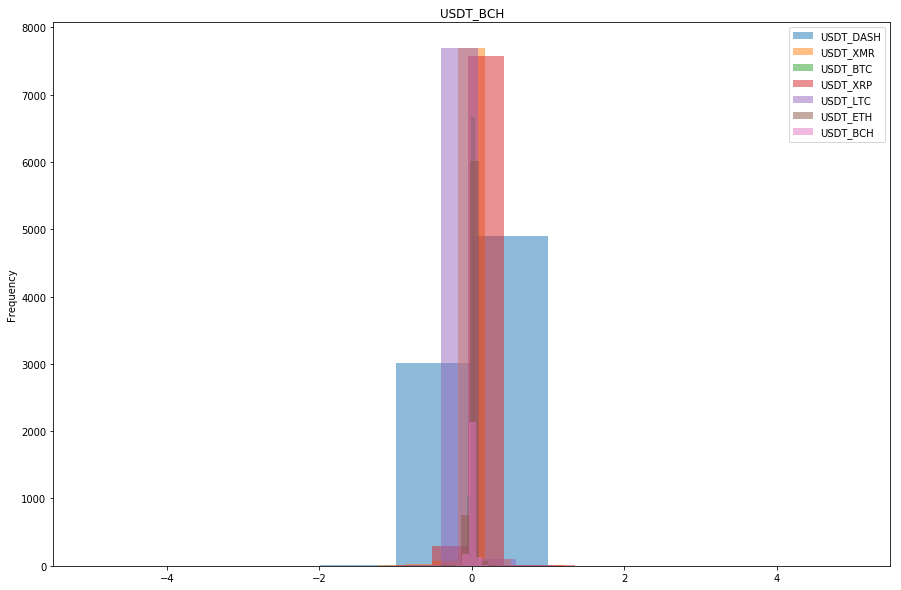

In [14]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY, scoin, log=False):    
    data.dropna().plot(kind='hist',x=attrX, y=attrY, figsize=(15,10),ax=ax, label=scoin, alpha=0.5)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )

    for scoin, stock_code_data in sorted_grouped_data:
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
        plt.title(scoin)

plot_all_histograms(grouped_data, plt, "date","log_return")

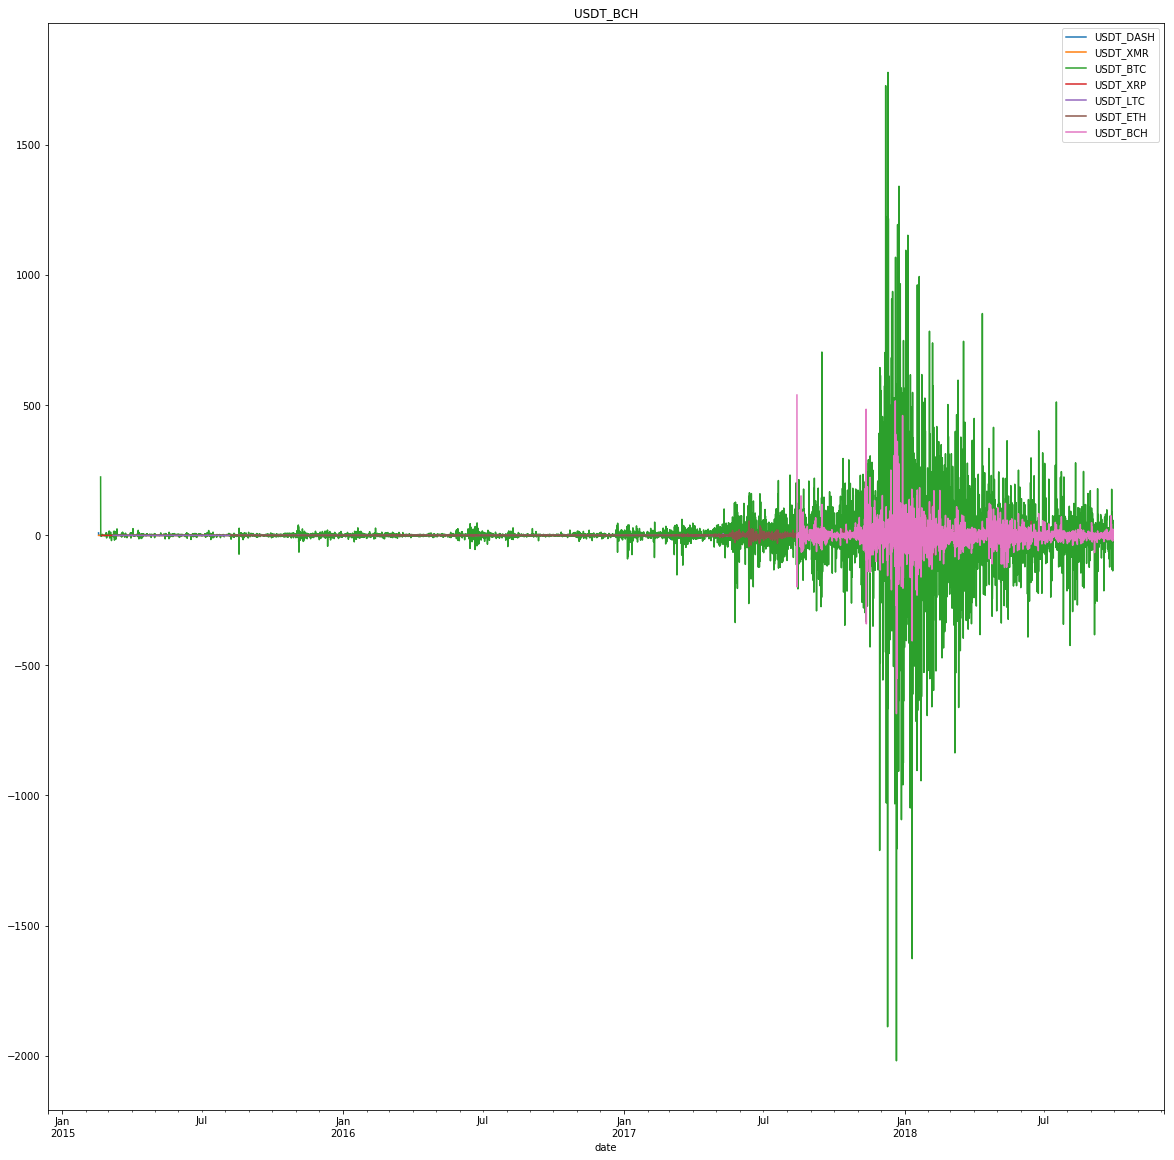

In [15]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY,scoin, log=False):    
    #data.dropna().plot(kind='density', figsize=(15,10))
    data.dropna().plot(kind='line', x=attrX, y=attrY, figsize=(20,20), ax=ax, label=scoin)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )

    for scoin, stock_code_data in sorted_grouped_data:        
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
        plt.title(scoin)

plot_all_histograms(grouped_data, plt, "date","variation")

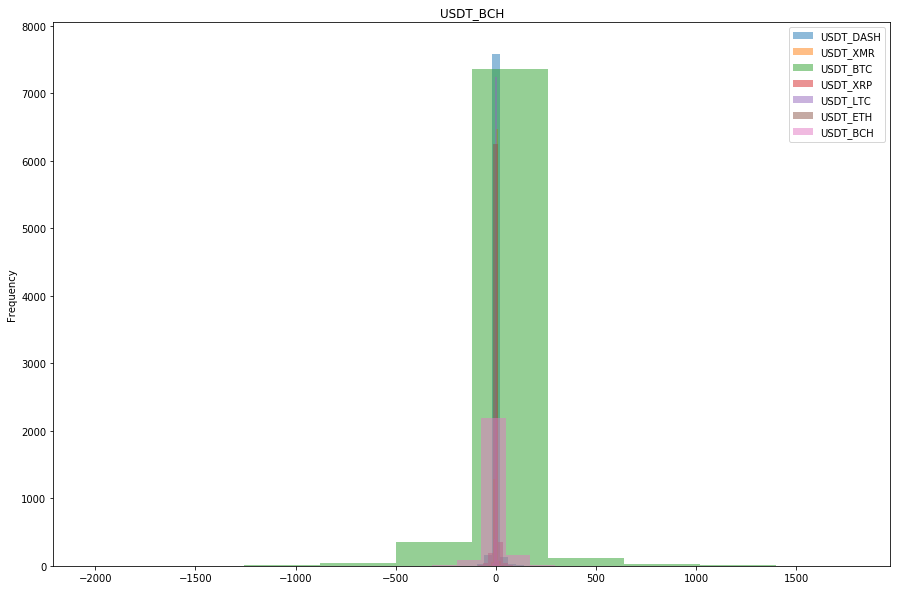

In [16]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY, scoin, log=False):    
    data.dropna().plot(kind='hist',x=attrX, y=attrY, figsize=(15,10),ax=ax, label=scoin, alpha=0.5)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )

    for scoin, stock_code_data in sorted_grouped_data:
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
        plt.title(scoin)

plot_all_histograms(grouped_data, plt, "date","variation")